In [62]:
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np
BASE_FOLDER =  r'../../'
filepath = r'\dataset\6dB\pump\id_02\abnormal\00000002.wav'
y, sr = librosa.load(os.path.abspath(BASE_FOLDER+filepath), sr=None, mono=False)
t = np.linspace(0,len(y[0])/sr,len(y[0]))

In [63]:
onset_frames = librosa.onset.onset_detect(y=y[0], sr=sr)
onset_time = librosa.frames_to_time(onset_frames, sr=sr)
print(onset_time)

[0.096 0.512 1.024 1.376 1.568 1.696 1.952 2.048 2.08  2.464 3.072 3.36
 3.616 3.648 4.224 4.256 4.416 4.8   5.248 5.76  6.144 6.176 6.4   6.528
 6.656 6.688 7.616 7.648 7.776 7.808 8.224 8.48  9.472 9.504]


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


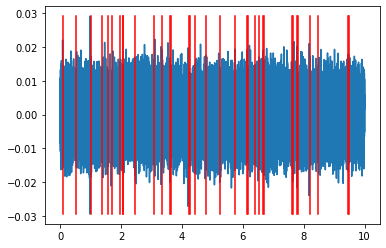

In [64]:

plt.plot(t,y[0])
m = [np.min(y[0]), np.max(y[0])]

for onset in onset_time:
    plt.plot([onset,onset],m,'r')

# onset backtrack

In [65]:
oenv = librosa.onset.onset_strength(y=y[0], sr=sr)
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv,backtrack=False)
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
onsetb_time = librosa.frames_to_time(onset_bt, sr=sr)

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\librosa\filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


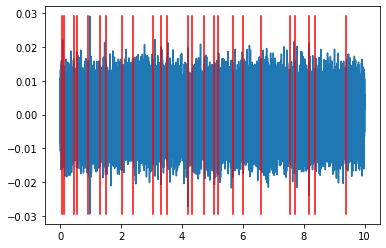

In [66]:
plt.plot(t,y[0])
m = [np.min(y[0]), np.max(y[0])]

for onset in onsetb_time:
    plt.plot([onset,onset],m,'r')

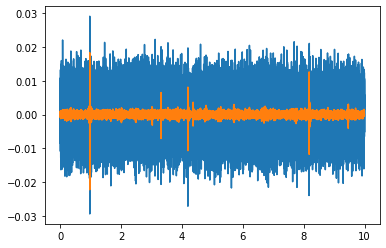

In [67]:
y_percussive = librosa.effects.percussive(y[0], margin=3.0)
plt.plot(t,y[0])
plt.plot(t,y_percussive)